In [15]:
# 一个测试例子，用于计算初始投资回收的年限
def calculate_years(E0, G, P):
    """
    计算从初始值E0开始,以年复利增长率G,累计到达预设值P所需的年数N。
    
    参数:
    E0 (float): 初始值
    G (float): 年复利增长率,取值范围(0, 1)
    P (float): 预设累计值
    
    返回:
    N (int): 达到预设累计值P所需的年数
    """
    
    PE = P / E0
    #print(f"PE = {PE}")  
    
    total = 0  # 初始累计值
    N = 0  # 初始年数
    
    while total < P:
        N += 1
        E = E0 * (1 + G) ** N  # 计算当年值E,修正公式
        total += E  # 累加到总值
        #print(f"E{N} = {E}, T = {total}")
        
    return N

# 示例用法
P = 68.46
E0 = 2.47
G = 0.0245

N = calculate_years(E0, G, P)
print("项数 N =", N)

项数 N = 22


In [14]:
# 利用LLM推导出来的公式，目前测试有点问题

import math

def estimate_years(E0, G, P):
  """
  计算等比数列的项数

  Args:
    P: 等比数列的和
    E0: 首项
    G: 增长率

  Returns:
    项数 N
  """

  if G == 0:
    raise ValueError("增长率G不能为0")

  N = math.ceil(math.log((P * G / E0) + 1, 1 + G))
  return N

# 示例用法
P = 68.46
E0 = 2.47
G = 0.0245

N = estimate_years(E0, G, P)
print("项数 N =", N)


项数 N = 22


In [12]:
# 使用示例
initial_value = 1  # 初始值E0
growth_rate = 0.05  # 年复利增长率G
target_value = 30  # 预设累计值P

years1 = calculate_years(initial_value, growth_rate, target_value)
print(f"达到预设累计值{target_value}所需的年数1为: {years1}年")

years2 = estimate_years(initial_value, growth_rate, target_value)
print(f"达到预设累计值{target_value}所需的年数2为: {years2}年")

达到预设累计值30所需的年数1为: 19年
达到预设累计值30所需的年数2为: 19年


In [16]:
growth_rates = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40]
ratios = [10, 20, 30, 40, 50, 60]

print("年复利增长率(G) | P/E0 = 10 | P/E0 = 20 | P/E0 = 30 | P/E0 = 40 | P/E0 = 50 | P/E0 = 60")
print("----------------+------------+------------+------------+------------+------------+------------")

for G in growth_rates:
    row = f"{G:.2f}            |"
    for ratio in ratios:
        E0 = 1  # 设置初始值为1
        P = ratio  # P/E0的值就是ratio
        N = calculate_years(E0, G, P)
        row += f"     {N:>5}   |"
    print(row)


年复利增长率(G) | P/E0 = 10 | P/E0 = 20 | P/E0 = 30 | P/E0 = 40 | P/E0 = 50 | P/E0 = 60
----------------+------------+------------+------------+------------+------------+------------
0.05            |         8   |        14   |        19   |        22   |        25   |        28   |
0.10            |         7   |        11   |        14   |        17   |        18   |        20   |
0.15            |         6   |        10   |        12   |        14   |        15   |        16   |
0.20            |         6   |         9   |        10   |        12   |        13   |        14   |
0.25            |         5   |         8   |         9   |        10   |        11   |        12   |
0.30            |         5   |         7   |         8   |         9   |        10   |        11   |
0.35            |         5   |         7   |         8   |         9   |         9   |        10   |
0.40            |         5   |         6   |         7   |         8   |         9   |         9   |


In [2]:
# 让GTP4o重新了一下

import math

def calculate_geometric_series_terms(initial_value, growth_rate, total_sum):
    """
    计算等比数列的项数

    参数:
        initial_value: 等比数列的首项
        growth_rate: 等比数列的增长率
        total_sum: 等比数列的目标和

    返回:
        项数 N
    """

    if growth_rate == 0:
        raise ValueError("增长率不能为0")

    # 计算等比数列项数的公式，并对结果进行向上取整
    num_terms = math.ceil(math.log((total_sum * growth_rate / initial_value) + 1, 1 + growth_rate))
    return num_terms

# 示例用法
total_sum = 30
initial_value = 1
growth_rate = 0.05

num_terms = calculate_geometric_series_terms(initial_value, growth_rate, total_sum)
print("项数 N =", num_terms)

项数 N = 19


In [9]:
# 英伟达的2022-23-24财年的收入数据

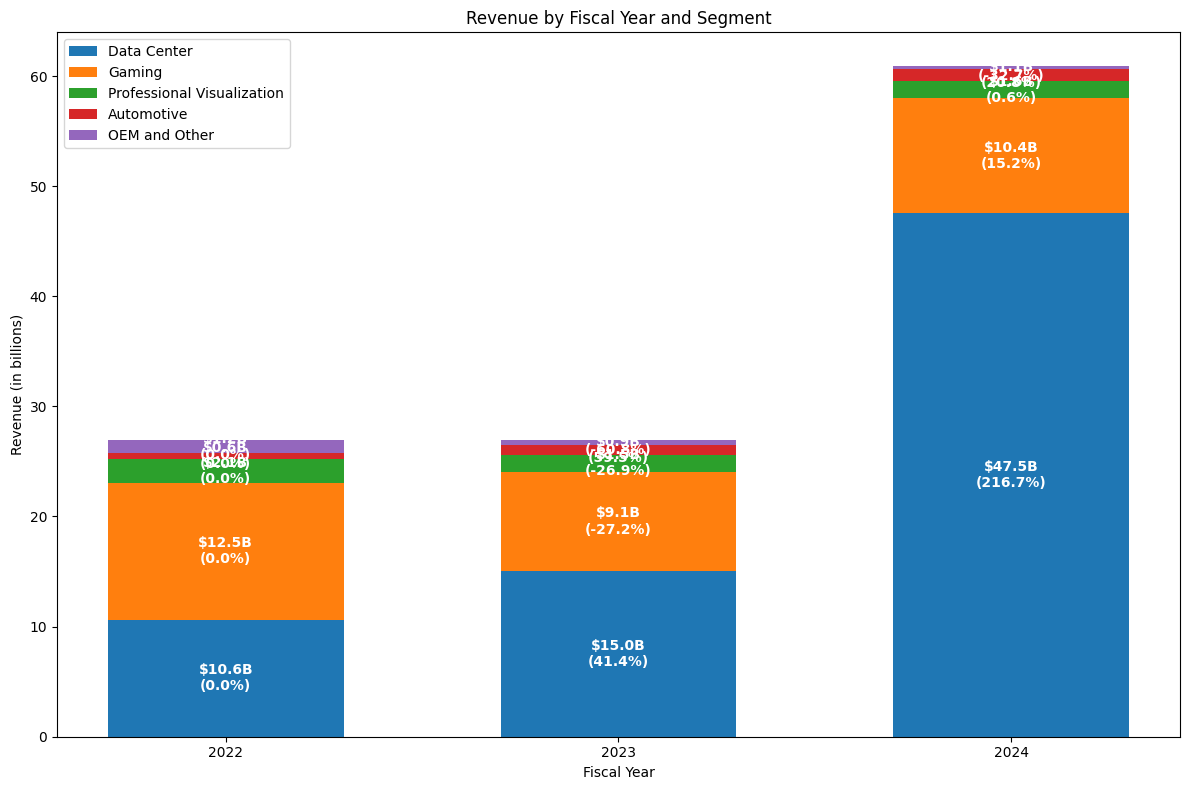

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
years = ["2022", "2023", "2024"]
revenue_data = {
    "Data Center": [10613, 15005, 47525],
    "Gaming": [12462, 9067, 10447],
    "Professional Visualization": [2111, 1544, 1553],
    "Automotive": [566, 903, 1091],
    "OEM and Other": [1162, 455, 306]
}

# 计算同比变化百分比
yoy_change = {segment: [(revenue_data[segment][i] - revenue_data[segment][i-1]) / revenue_data[segment][i-1] * 100 
                         if i > 0 else 0 for i in range(len(years))] for segment in revenue_data}

# 将单位从百万美元转换为十亿美元
revenue_data = {segment: [x / 1000 for x in revenue] for segment, revenue in revenue_data.items()}

# 设置图形窗口大小
fig, ax = plt.subplots(figsize=(12, 8))

# 计算柱状图的位置
bar_width = 0.6
indices = np.arange(len(years))

# 逐个业务部门绘制堆叠柱状图，并添加文本标签
bottoms = np.zeros(len(years))
for segment, revenue in revenue_data.items():
    ax.bar(indices, revenue, bar_width, label=segment, bottom=bottoms)
    for i in range(len(years)):
        # 添加收入和同比变化百分比文本
        ax.text(indices[i], bottoms[i] + revenue[i] / 2, 
                f'${revenue[i]:.1f}B\n({yoy_change[segment][i]:.1f}%)', 
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    bottoms += revenue

# 设置图表的标题和轴标签
ax.set_title('Revenue by Fiscal Year and Segment')
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Revenue (in billions)')
ax.set_xticks(indices)
ax.set_xticklabels(years)

# 添加图例
ax.legend()

# 显示图表
plt.tight_layout()
plt.show()


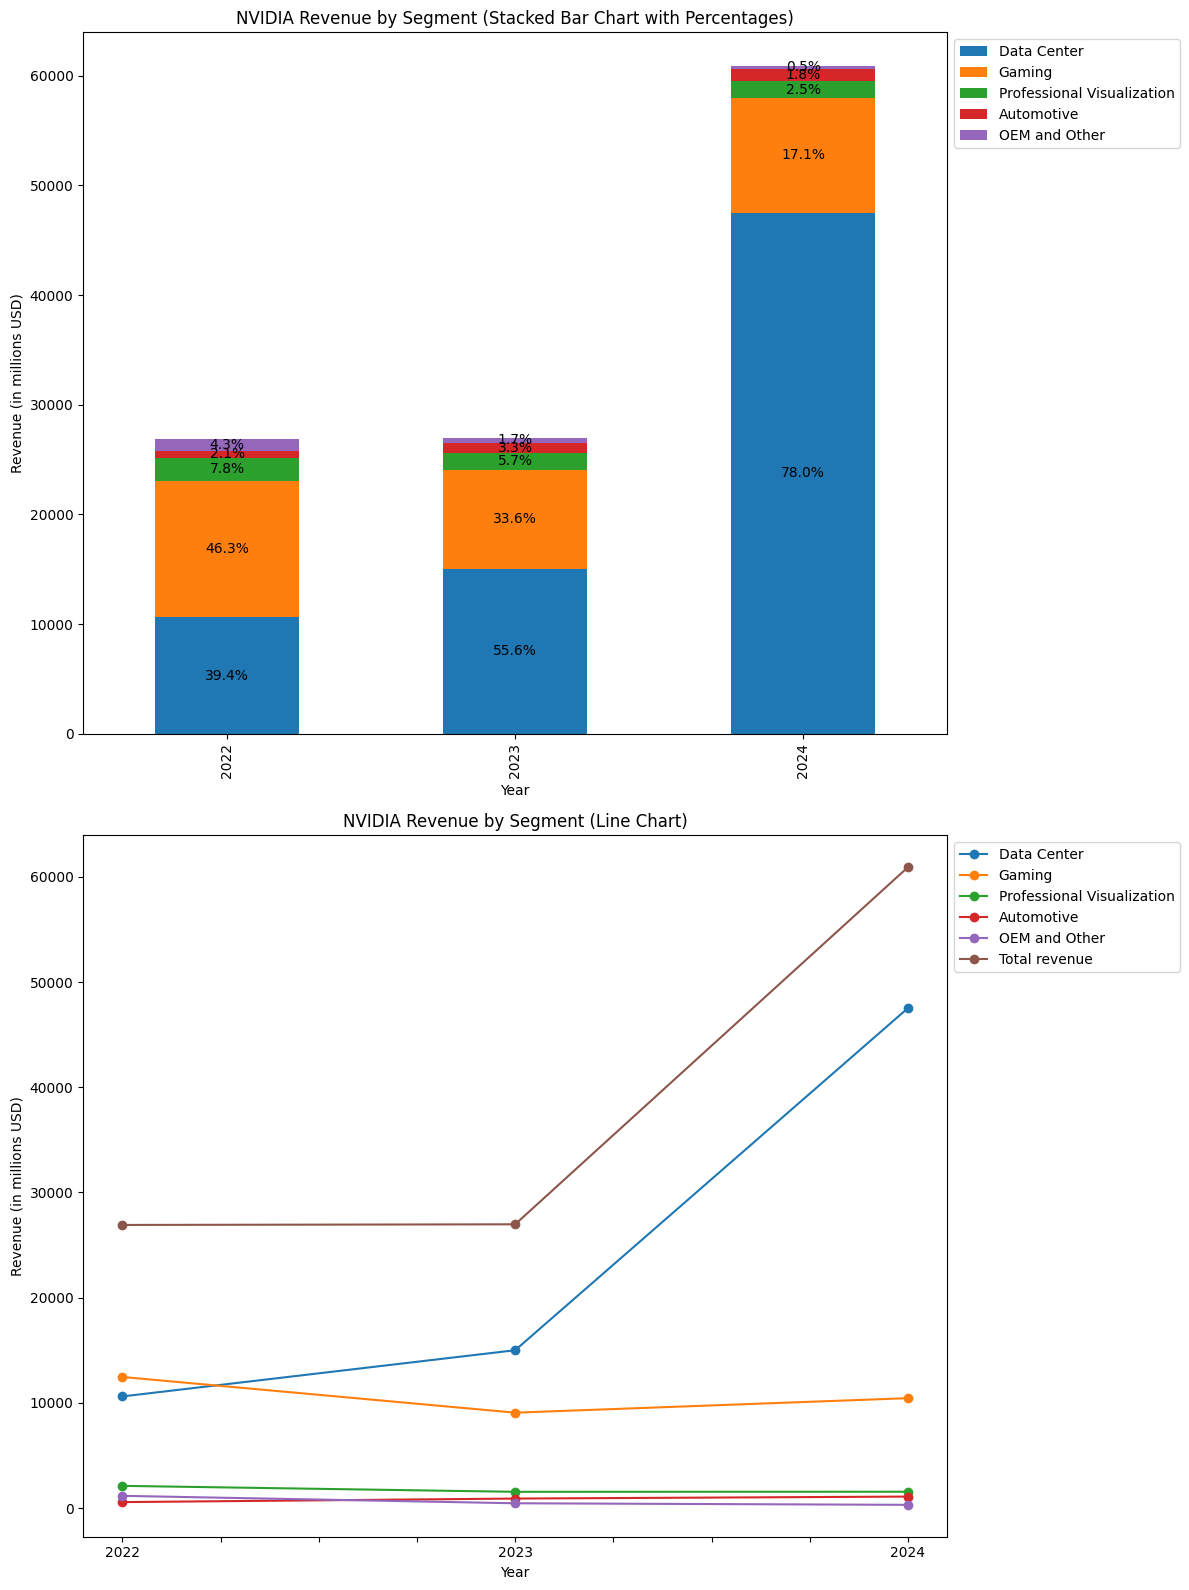

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建数据框
data = {
    'Year': ['2022', '2023', '2024'],
    'Data Center': [10613, 15005, 47525],
    'Gaming': [12462, 9067, 10447],
    'Professional Visualization': [2111, 1544, 1553],
    'Automotive': [566, 903, 1091],
    'OEM and Other': [1162, 455, 306],
    'Total revenue': [26914, 26974, 60922]
}

df = pd.DataFrame(data)
df = df.set_index('Year')

# 计算百分比
for col in df.columns:
    if col != 'Total revenue':
        df[f'{col}_pct'] = df[col] / df['Total revenue'] * 100

# 创建堆叠柱状图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

segments = ['Data Center', 'Gaming', 'Professional Visualization', 'Automotive', 'OEM and Other']
df[segments].plot(kind='bar', stacked=True, ax=ax1)

# 添加百分比标签
for i, year in enumerate(df.index):
    bottom = 0
    for segment in segments:
        height = df.loc[year, segment]
        percentage = df.loc[year, f'{segment}_pct']
        ax1.text(i, bottom + height/2, f'{percentage:.1f}%', ha='center', va='center')
        bottom += height

ax1.set_title('NVIDIA Revenue by Segment (Stacked Bar Chart with Percentages)')
ax1.set_ylabel('Revenue (in millions USD)')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 创建折线图
df[segments + ['Total revenue']].plot(ax=ax2, marker='o')
ax2.set_title('NVIDIA Revenue by Segment (Line Chart)')
ax2.set_ylabel('Revenue (in millions USD)')
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [19]:
# 可口可乐的收入数据

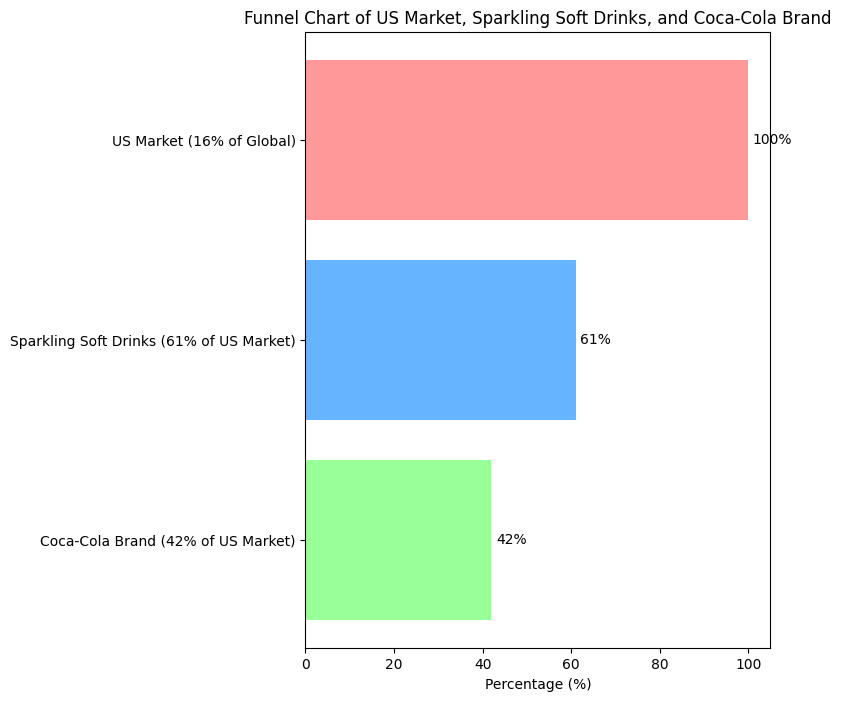

In [20]:
import matplotlib.pyplot as plt

# 数据
total_us_market = 100  # 美国市场占全球销量的16%
sparkling_soft_drinks = 61  # 美国市场中起泡软饮料占比61%
coca_cola_brand = 42  # 美国市场中可口可乐品牌占比42%

# 漏斗图数据
values = [total_us_market, sparkling_soft_drinks, coca_cola_brand]
labels = ["US Market (16% of Global)", "Sparkling Soft Drinks (61% of US Market)", "Coca-Cola Brand (42% of US Market)"]

# 绘制漏斗图
fig, ax = plt.subplots(figsize=(6, 8))

ax.invert_yaxis()
ax.barh(labels, values, color=['#ff9999', '#66b3ff', '#99ff99'])

for index, value in enumerate(values):
    ax.text(value + 1, index, f'{value}%', va='center')

ax.set_xlabel('Percentage (%)')
ax.set_title('Funnel Chart of US Market, Sparkling Soft Drinks, and Coca-Cola Brand')

plt.show()


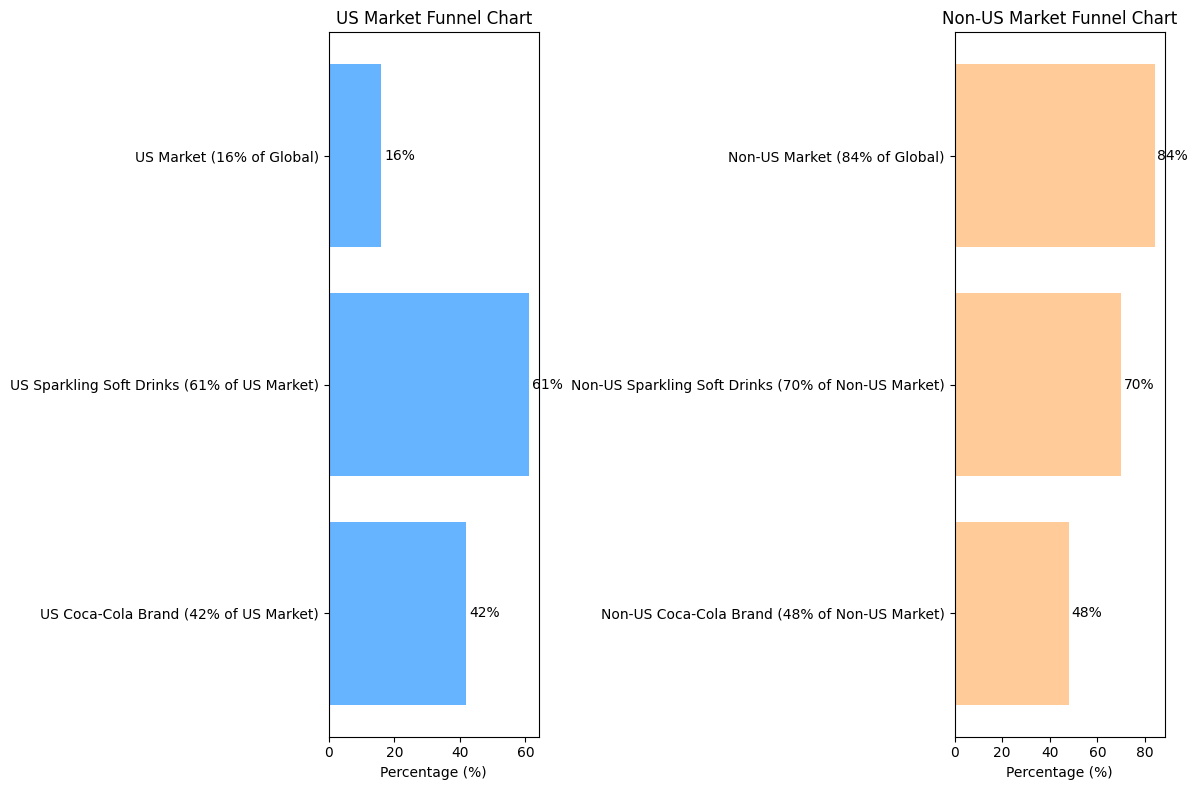

In [23]:
import matplotlib.pyplot as plt

# 数据
us_market = 16  # 美国市场占全球销量的16%
non_us_market = 84  # 非美国市场占全球销量的84%

us_sparkling_soft_drinks = 61  # 美国市场中起泡软饮料占比61%
non_us_sparkling_soft_drinks = 70  # 非美国市场中起泡软饮料占比70%

us_coca_cola_brand = 42  # 美国市场中可口可乐品牌占比42%
non_us_coca_cola_brand = 48  # 非美国市场中可口可乐品牌占比48%

# 绘制漏斗图
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# 美国市场漏斗图
us_values = [us_market, us_sparkling_soft_drinks, us_coca_cola_brand]
us_labels = ["US Market (16% of Global)", "US Sparkling Soft Drinks (61% of US Market)", "US Coca-Cola Brand (42% of US Market)"]

axs[0].invert_yaxis()
axs[0].barh(us_labels, us_values, color=['#66b3ff', '#66b3ff', '#66b3ff'])

for index, value in enumerate(us_values):
    axs[0].text(value + 1, index, f'{value}%', va='center')

axs[0].set_xlabel('Percentage (%)')
axs[0].set_title('US Market Funnel Chart')

# 非美国市场漏斗图
non_us_values = [non_us_market, non_us_sparkling_soft_drinks, non_us_coca_cola_brand]
non_us_labels = ["Non-US Market (84% of Global)", "Non-US Sparkling Soft Drinks (70% of Non-US Market)", "Non-US Coca-Cola Brand (48% of Non-US Market)"]

axs[1].invert_yaxis()
axs[1].barh(non_us_labels, non_us_values, color=['#ffcc99', '#ffcc99', '#ffcc99'])

for index, value in enumerate(non_us_values):
    axs[1].text(value + 1, index, f'{value}%', va='center')

axs[1].set_xlabel('Percentage (%)')
axs[1].set_title('Non-US Market Funnel Chart')

plt.tight_layout()
plt.show()


In [27]:
# 用折线图画出最近五年几家互联网公司巨头的市场表现

In [24]:
pip install pandas_datareader matplotlib yfinance

  Obtaining dependency information for pandas_datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/39/29/89572cb0c65b07a1c4e5cd53eb0a0f947f2ece53fef6ed7da90cfab7d2a9/yfinance-0.2.43-py2.py3-none-any.whl.metadata
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/23/b2/45e12a5b8508ee9de0af432d0dc5fcc786cd78037d692a3de7571c2db04c/lxml-5.3.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 714.2 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting require

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


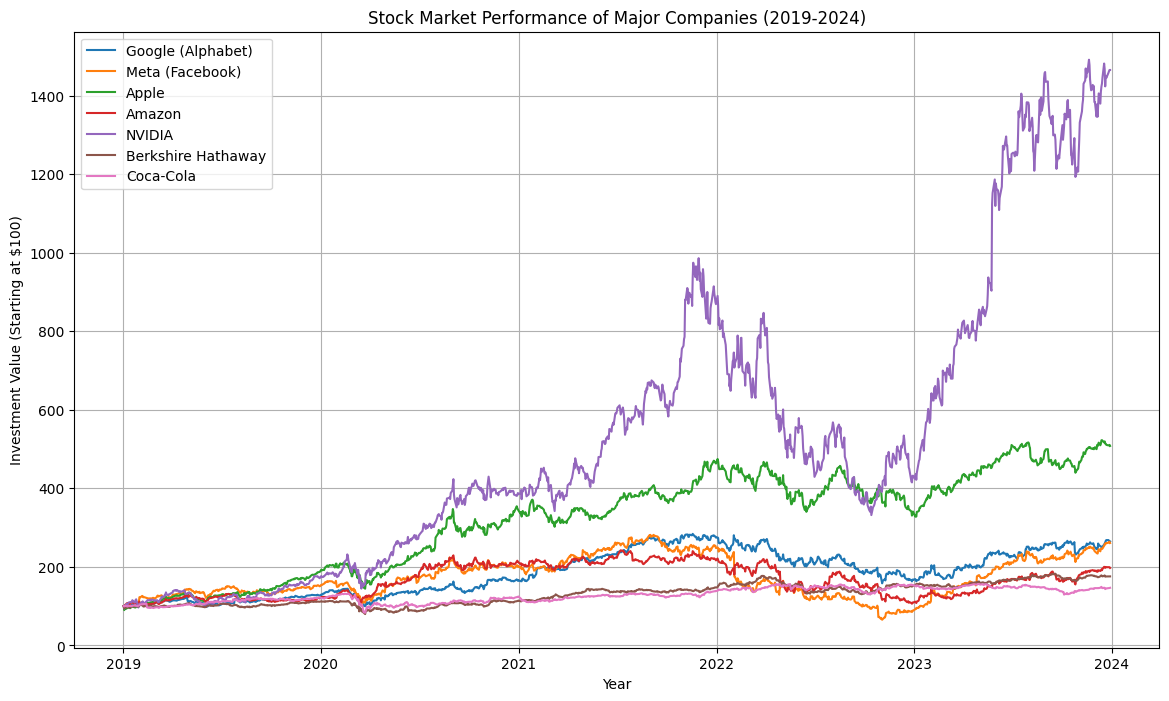

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

# Define the companies' tickers
tickers = {
    'Google (Alphabet)': 'GOOGL',
    'Meta (Facebook)': 'META',
    'Apple': 'AAPL',
    'Amazon': 'AMZN',
    'NVIDIA': 'NVDA',
    'Berkshire Hathaway': 'BRK-B',
    'Coca-Cola': 'KO'
}

# Define the start and end dates
start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime(2024, 1, 1)

# Fetch the adjusted close prices using yfinance directly
price_data = {}
for company, ticker in tickers.items():
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    price_data[company] = stock_data['Adj Close']

# Create a DataFrame
price_df = pd.DataFrame(price_data)

# Normalize the prices to start at 100
normalized_price_df = (price_df / price_df.iloc[0]) * 100

# Plotting the normalized prices
plt.figure(figsize=(14, 8))
for column in normalized_price_df.columns:
    plt.plot(normalized_price_df.index, normalized_price_df[column], label=column)

plt.title("Stock Market Performance of Major Companies (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Investment Value (Starting at $100)")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# 比较拼多多与S&P500的过去5年市场表现

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


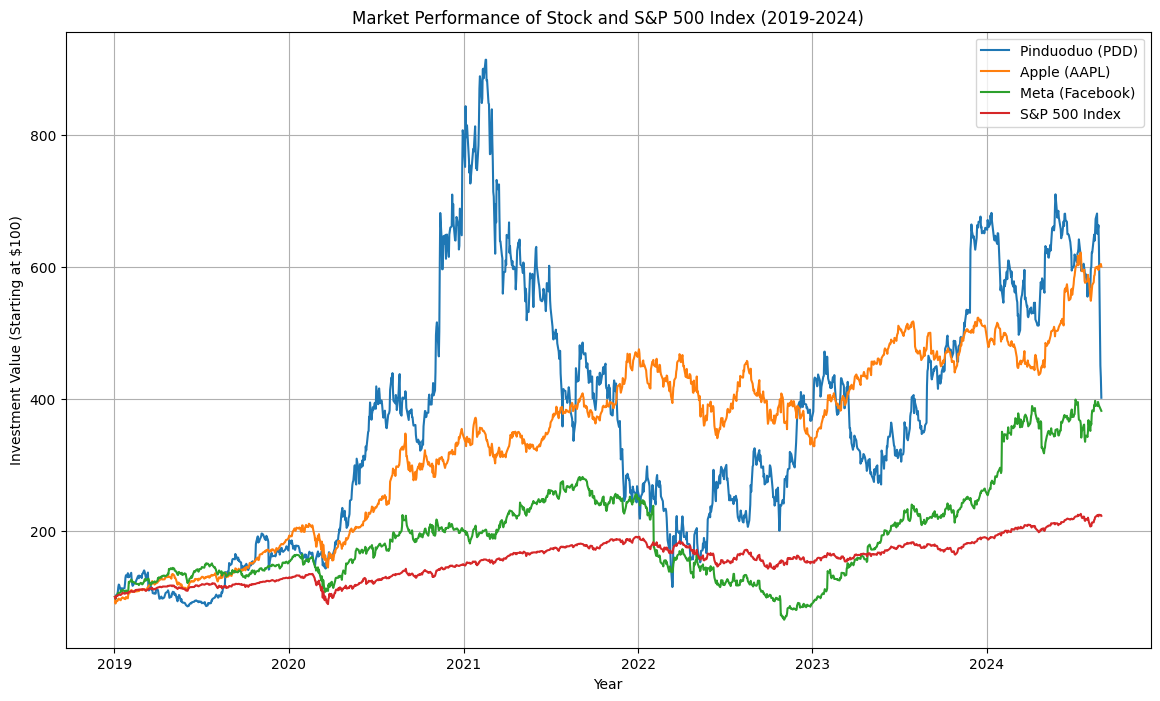

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

# 定义股票代码
tickers = {
    'Pinduoduo (PDD)': 'PDD',
    'Apple (AAPL)': 'AAPL',
    'Meta (Facebook)': 'META',
    'S&P 500 Index': '^GSPC'
}

# 定义开始和结束日期
start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime(2024, 8, 29)

# 使用yfinance获取调整后的收盘价
price_data = {}
for company, ticker in tickers.items():
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    price_data[company] = stock_data['Adj Close']

# 创建DataFrame
price_df = pd.DataFrame(price_data)

# 标准化价格，使初始投资为100美元
normalized_price_df = (price_df / price_df.iloc[0]) * 100

# 绘制标准化后的价格折线图
plt.figure(figsize=(14, 8))
for column in normalized_price_df.columns:
    plt.plot(normalized_price_df.index, normalized_price_df[column], label=column)

plt.title("Market Performance of Stock and S&P 500 Index (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Investment Value (Starting at $100)")
plt.legend()
plt.grid(True)
plt.show()
